# Музыка больших городов 🎸

**Цель исследования** — проверить три различные гипотезы:
1. Активность пользователей зависит от дня недели. Более того, разные дни недели по разному влияют на жителей Москвы и Санкт-Петербурга.
2. Жители Москвы и Санкт-Петербурга слушают разные жанры утром понедельника и вечером пятницы.
3. Жители Москвы и Санкт-Петербурга предпочитают разные жанры музыки. В Москве в основном слушают поп, а в Санкт-Петербурге - русский рэп.

**Содержание**<a id='toc0_'></a>    
1. [Преднастройка ](#toc1_)    
2. [Загрузка данных ](#toc2_)    
3. [Предобработка данных ](#toc3_)    
3.1. [Некорректные названия столбцов ](#toc3_1_)    
3.2. [Обработка пропусков ](#toc3_2_)    
3.3. [Обработка явных дубликатов ](#toc3_3_)    
3.4. [Обработка неявных дубликатов ](#toc3_4_)    
4. [Исследование ](#toc4_)    
4.1. [Разница по дням недели ](#toc4_1_)    
4.2. [Разница по городам утром понедельника и вечером пятницы ](#toc4_2_)    
4.3. [Разные жанры в Москве и Санкт-Петербурге ](#toc4_3_)    
5. [Результаты исследования ](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>Преднастройка  [&#8593;](#toc0_)

In [1]:
from IPython.display import clear_output

In [2]:
%pip install --upgrade -q pandas
%pip install --upgrade -q seaborn
%pip install --upgrade -q prettytable
%pip install --upgrade -q termcolor

clear_output()

In [3]:
import pandas as pd
import seaborn as sns

from prettytable import PrettyTable
from termcolor import colored

In [4]:
import warnings
warnings.filterwarnings('ignore')

## 2. <a id='toc2_'></a>Загрузка данных  [&#8593;](#toc0_)

In [5]:
# dataset not presented in the repository due to copyright
df = pd.read_csv('./data/data.csv')

In [6]:
df.head()

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


## 3. <a id='toc3_'></a>Предобработка данных  [&#8593;](#toc0_)

### 3.1. <a id='toc3_1_'></a>Некорректные названия столбцов  [&#8593;](#toc0_)

In [8]:
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

In [9]:
df = df.rename(columns={
    '  userID': 'user_id',
    'Track': 'track',
    '  City  ': 'city',
    'Day': 'day'
})

In [10]:
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### 3.2. <a id='toc3_2_'></a>Обработка пропусков  [&#8593;](#toc0_)

In [11]:
def print_table_about_nans(data: pd.DataFrame) -> None:
    table = PrettyTable()
    table.field_names = ['Feature', 'Missing values count']

    missing_info = data.isna().sum().sort_values()
    cols = missing_info.index.to_list()
    for col in cols:
        count = missing_info[col]
        color = 'green' if count == 0 else 'red'
        s = f'{count} ({count / len(data):.2%})'
        table.add_row([col, colored(s, color)])

    print(table)

In [12]:
print_table_about_nans(df)

+---------+----------------------+
| Feature | Missing values count |
+---------+----------------------+
| user_id |      0 (0.00%)       |
|   city  |      0 (0.00%)       |
|   time  |      0 (0.00%)       |
|   day   |      0 (0.00%)       |
|  genre  |     1198 (1.84%)     |
|  track  |     1231 (1.89%)     |
|  artist |    7203 (11.07%)     |
+---------+----------------------+


В данном случае все пропуски в категориальных переменных. Восстановить значения, к сожалению, не представляется возможным. Также невозможно заполнение медианным значением. Поэтому заполним все пропуски значением `unknown`.

In [13]:
df = df.fillna('unknown')

In [14]:
print_table_about_nans(df)

+---------+----------------------+
| Feature | Missing values count |
+---------+----------------------+
| user_id |      0 (0.00%)       |
|  track  |      0 (0.00%)       |
|  artist |      0 (0.00%)       |
|  genre  |      0 (0.00%)       |
|   city  |      0 (0.00%)       |
|   time  |      0 (0.00%)       |
|   day   |      0 (0.00%)       |
+---------+----------------------+


### 3.3. <a id='toc3_3_'></a>Обработка явных дубликатов  [&#8593;](#toc0_)

In [15]:
df.duplicated().sum()

3826

In [16]:
df = df.drop_duplicates().reset_index(drop=True)

In [17]:
df.duplicated().sum()

0

### 3.4. <a id='toc3_4_'></a>Обработка неявных дубликатов  [&#8593;](#toc0_)

In [18]:
sorted(df['genre'].unique())

['acid',
 'acoustic',
 'action',
 'adult',
 'africa',
 'afrikaans',
 'alternative',
 'alternativepunk',
 'ambient',
 'americana',
 'animated',
 'anime',
 'arabesk',
 'arabic',
 'arena',
 'argentinetango',
 'art',
 'audiobook',
 'author',
 'avantgarde',
 'axé',
 'baile',
 'balkan',
 'beats',
 'bigroom',
 'black',
 'bluegrass',
 'blues',
 'bollywood',
 'bossa',
 'brazilian',
 'breakbeat',
 'breaks',
 'broadway',
 'cantautori',
 'cantopop',
 'canzone',
 'caribbean',
 'caucasian',
 'celtic',
 'chamber',
 'chanson',
 'children',
 'chill',
 'chinese',
 'choral',
 'christian',
 'christmas',
 'classical',
 'classicmetal',
 'club',
 'colombian',
 'comedy',
 'conjazz',
 'contemporary',
 'country',
 'cuban',
 'dance',
 'dancehall',
 'dancepop',
 'dark',
 'death',
 'deep',
 'deutschrock',
 'deutschspr',
 'dirty',
 'disco',
 'dnb',
 'documentary',
 'downbeat',
 'downtempo',
 'drum',
 'dub',
 'dubstep',
 'eastern',
 'easy',
 'electronic',
 'electropop',
 'emo',
 'entehno',
 'epicmetal',
 'estrada',


In [19]:
df['genre'] = df['genre'].replace(['hip', 'hop', 'hip-hop'], 'hiphop')
df['genre'] = df['genre'].replace({'электроника': 'electronic'})

In [20]:
sorted(df['genre'].unique())

['acid',
 'acoustic',
 'action',
 'adult',
 'africa',
 'afrikaans',
 'alternative',
 'alternativepunk',
 'ambient',
 'americana',
 'animated',
 'anime',
 'arabesk',
 'arabic',
 'arena',
 'argentinetango',
 'art',
 'audiobook',
 'author',
 'avantgarde',
 'axé',
 'baile',
 'balkan',
 'beats',
 'bigroom',
 'black',
 'bluegrass',
 'blues',
 'bollywood',
 'bossa',
 'brazilian',
 'breakbeat',
 'breaks',
 'broadway',
 'cantautori',
 'cantopop',
 'canzone',
 'caribbean',
 'caucasian',
 'celtic',
 'chamber',
 'chanson',
 'children',
 'chill',
 'chinese',
 'choral',
 'christian',
 'christmas',
 'classical',
 'classicmetal',
 'club',
 'colombian',
 'comedy',
 'conjazz',
 'contemporary',
 'country',
 'cuban',
 'dance',
 'dancehall',
 'dancepop',
 'dark',
 'death',
 'deep',
 'deutschrock',
 'deutschspr',
 'dirty',
 'disco',
 'dnb',
 'documentary',
 'downbeat',
 'downtempo',
 'drum',
 'dub',
 'dubstep',
 'eastern',
 'easy',
 'electronic',
 'electropop',
 'emo',
 'entehno',
 'epicmetal',
 'estrada',


## 4. <a id='toc4_'></a>Исследование  [&#8593;](#toc0_)

### 4.1. <a id='toc4_1_'></a>Разница по дням недели  [&#8593;](#toc0_)

In [21]:
df['city'].value_counts()

city
Moscow              42741
Saint-Petersburg    18512
Name: count, dtype: int64

In [22]:
df['day'].value_counts()

day
Friday       21840
Monday       21354
Wednesday    18059
Name: count, dtype: int64

In [23]:
def number_tracks(day: str, city: str) -> int:
    return len(df.query('day == @day and city == @city'))

In [24]:
columns = ['Monday', 'Wednesday', 'Friday']

listening_info = pd.DataFrame(
    data=[
        [
            number_tracks('Monday', 'Moscow'),
            number_tracks('Wednesday', 'Moscow'),
            number_tracks('Friday', 'Moscow')
        ],
        [
            number_tracks('Monday', 'Saint-Petersburg'), 
            number_tracks('Wednesday', 'Saint-Petersburg'), 
            number_tracks('Friday', 'Saint-Petersburg')
        ]
    ],
    columns=columns,
    index=['Moscow', 'Saint-Petersburg']
)

listening_info

,Monday,Wednesday,Friday
Moscow,15740,11056,15945
Saint-Petersburg,5614,7003,5895


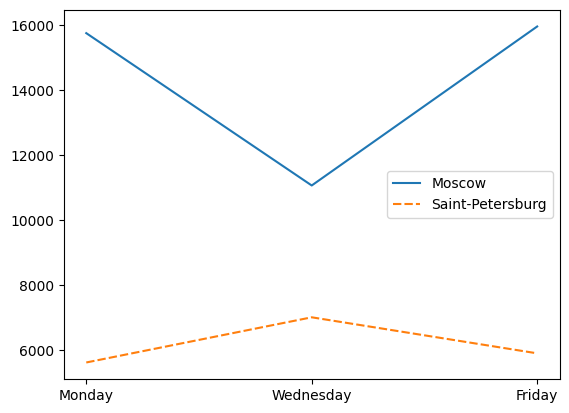

In [25]:
sns.lineplot(listening_info.T);

**Вывод**

Данные показывают некоторые различия в поведении пользователей:

- В Москве пик прослушивания приходится на понедельник и пятницу, а в среду наблюдается заметный спад.
- В Санкт-Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной степени уступает среде.

Таким образом, данные говорят в пользу первой гипотезы.

### 4.2. <a id='toc4_2_'></a>Разница по городам утром понедельника и вечером пятницы  [&#8593;](#toc0_)

Согласно второй гипотезе, в понедельник утром в Москве преобладают одни жанры, а в Санкт-Петербурге - другие. Аналогичным образом, в пятницу вечером преобладают разные жанры, в зависимости от города.

In [26]:
moscow_general = df[df['city'] == 'Moscow']
spb_general = df[df['city'] == 'Saint-Petersburg']

In [27]:
def genre_weekday(df: pd.DataFrame,
                  day: str,
                  time1: str,
                  time2: str
                  ) -> pd.Series:
    
    genre_df = df.query('day == @day and time < @time2 and time > @time1')
    return genre_df['genre'].value_counts()[:10]

In [28]:
genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: count, dtype: int64

In [29]:
genre_weekday(spb_general, 'Monday', '07:00', '11:00')

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: count, dtype: int64

In [30]:
genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: count, dtype: int64

In [31]:
genre_weekday(spb_general, 'Friday', '17:00', '23:00')

genre
pop            256
electronic     216
rock           216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: count, dtype: int64

**Выводы**

Если мы сравним топ-10 жанров по состоянию на утро понедельника, то можем сделать следующие выводы:

1. В Москве и Санкт-Петербурге слушают похожую музыку. Разница лишь в том, что московский рейтинг включает жанр "world", в то время как рейтинг Санкт-Петербурга включает джаз и классику.

2. В Москве было так много пропущенных значений, что значение `unknown` заняло десятое место среди самых популярных жанров. Это означает, что недостающие значения занимают значительную долю в данных и ставят под угрозу достоверность исследования.

Вечер пятницы не меняет этой картины. Некоторые жанры поднимаются немного выше, другие опускаются, но в целом топ-10 остается прежним.

Таким образом, вторая гипотеза подтвердилась лишь частично:
- Пользователи слушают похожую музыку в начале недели и в конце.
- Разница между Москвой и Санкт-Петербургом не слишком велика. В Москве чаще слушают русскую популярную музыку, в Санкт-Петербурге — джаз.

Однако неточности в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные данные о жанрах.

### 4.3. <a id='toc4_3_'></a>Разные жанры в Москве и Санкт-Петербурге  [&#8593;](#toc0_)

**Гипотеза**: Санкт-Петербург - столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва - город контрастов, в котором, тем не менее, преобладает поп-музыка.

In [32]:
moscow_general['genre'].value_counts()[:10]

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: count, dtype: int64

In [33]:
spb_general['genre'].value_counts()[:10]

genre
pop            2431
dance          1932
rock           1879
electronic     1737
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: count, dtype: int64

**Выводы:**

Гипотеза частично подтвердилась:
- Поп-музыка, как и предполагалось, является самым популярным жанром в Москве. Более того, в топ-10 жанров входит похожий жанр - российская популярная музыка.
- Вопреки ожиданиям, рэп одинаково популярен в Москве и Санкт-Петербурге.

## 5. <a id='toc5_'></a>Результаты исследования  [&#8593;](#toc0_)

Мы проверили 3 различные гипотезы и вот что выяснили:

**Гипотеза № 1**  
День недели по разному влияет на жанровые предпочтения жителей Москвы и Санкт-Петербурга.

Первая гипотеза полностью подтвердилась.

---

**Гипотеза № 2**  
Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Санкт-Петербург. Небольшие различия заметны в начале недели, по понедельникам:
- в Москве слушают музыку в жанре "world",
- в Санкт-Петербурге - джаз и классическую музыку.

Вторая гипотеза подтверждена только частично. Однако результаты могли быть другими, если бы не пропуски в данных.

---

**Гипотеза № 3**  
Между пользователями из Москвы и Санкт-Петербурга больше сходств, нежели различий. Вопреки ожиданиям, жанровые предпочтениями в этих городах довольно похожи.

Третья гипотеза НЕ подтвердилась. Даже если есть некоторые различия в предпочтениях, то на большинстве пользователей они не заметны.